# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading dataset
visa = pd.read_csv('/content/drive/MyDrive/Data Science and Business Analytics/Ensemble Techniques/Project 5/EasyVisa.csv')

In [ ]:
# copying data to another varaible to avoid any changes to original data
data = visa.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [ ]:
data.shape

(25480, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Observations**
-
-


In [ ]:
# Converting "objects" to "category" reduces the data space required to store the dataframe
cols = data.select_dtypes(['object'])
cols.columns

for i in cols.columns:
    data[i] = data[i].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations**
- There are observations about 6 continents with Asia being the most frequent
- There are 4 education classes with Bachelor's being the more frequent
- There are 5 regions of employment, Northeast being the more frequent
- The minimum number of employes from a corporation requesting visas is -26 which might be a typo that we will explore later.
- Companies applying for visas have been established over a span of years ranging from 1800 to 2016.


In [ ]:
data.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

In [ ]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
col_categ= data.select_dtypes(['category'])
for i in col_categ.columns:
  print('unique values in',i, 'are:')
  print(col_categ[i].value_counts())
  print('*'*50)

unique values in case_id are:
case_id
EZYV01       1
EZYV25287    1
EZYV25285    1
EZYV25284    1
EZYV25283    1
            ..
EZYV17633    1
EZYV17632    1
EZYV17631    1
EZYV17630    1
EZYV9999     1
Name: count, Length: 25480, dtype: int64
**************************************************
unique values in continent are:
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
**************************************************
unique values in education_of_employee are:
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
**************************************************
unique values in has_job_experience are:
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
**************************************************
unique values in requires_job_training are:
requires_job_train

**Dropping columns which are not adding any information.**

In [ ]:
data.drop('case_id', axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

#### Functions

In [ ]:
# creating a function to create labeled barplots
def labeled_barplot(data, feature, perc=True, legend=False, n=None):
  '''
  Barplot with percentage at the top
  data: dataframe
  feature: dataframe column
  perc: whether to display percentages instead of count (default is True)
  n: display the top n category levels (default is None, i.e., display all levels)
  '''
  total=len(data[feature]) # Lenght of the column
  count=data[feature].nunique()
  if n is None:
    plt.figure(figsize=(count + 2, 6))
  else:
    plt.figure(figsize=(n +2, 6))

  plt.xticks(rotation=90, fontsize=15)
  ax=sns.countplot(data=data, x=feature, hue=feature, legend=False, palette='Paired', order=data[feature].value_counts().index[:n],)

  for p in ax.patches:
    if perc == True:
      label = "{:.1f}%".format(100*p.get_height() / total) # Percentage of each class of the category
      x = p.get_x() + p.get_width() / 2  # width of the plot
      y = p.get_height() # height of the plot
      ax.annotate(label, (x,y), ha='center', va='center', size=12, xytext=(0,5), textcoords='offset points',) # annotate the percentage
    else:
      label = p.get_height() #count of each level of the category


  plt.show()

In [ ]:
# function to create histogram and boxplot together

def histogram_boxplot(data, feature, figsize=(10, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10,5))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

**TARGET VARIABLE - Case Status**
- 68% of observations got certified
- The target class is unbalanced

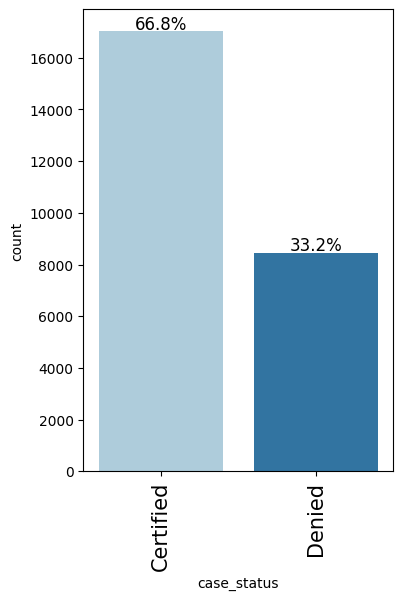

In [ ]:
labeled_barplot(data, 'case_status')

**Continent**
- Asia has the highest solicitations for visas accounting for 66.2% of all observations followed by Europe with 14.6% and North America with 12.9%.

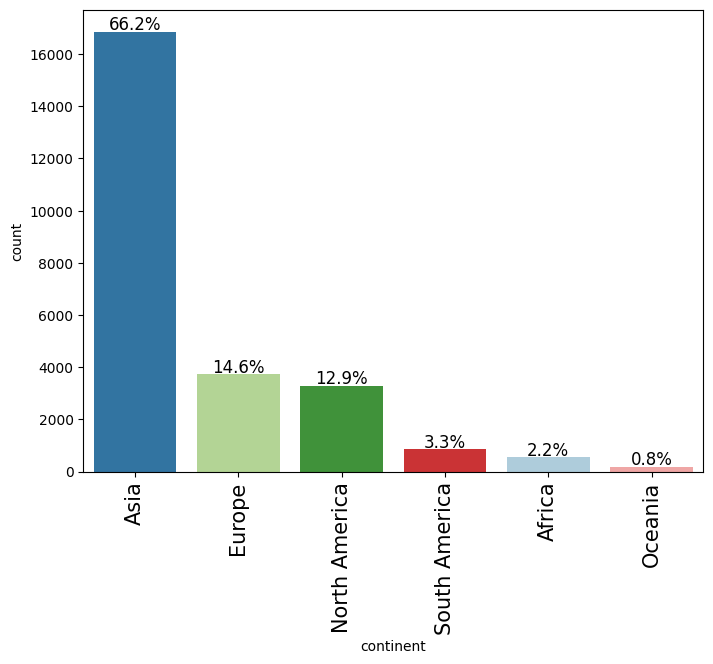

In [ ]:
labeled_barplot(data, 'continent')

**Education of Employee**
- The majority of visa applications are submitted by individuals holding educational qualifications of Bachelor's and Master's degrees, comprising 40.2% and 37.8% of applicants, respectively.
- 13.4% applicants have a high school degree background while 8.6% have a Doctorate degree.

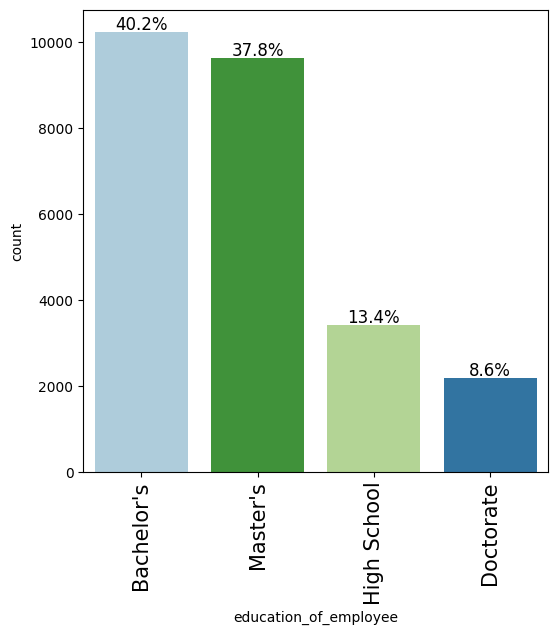

In [ ]:
labeled_barplot(data, 'education_of_employee')

**Job Experience**
- 58.1 % of applicants have job experiance

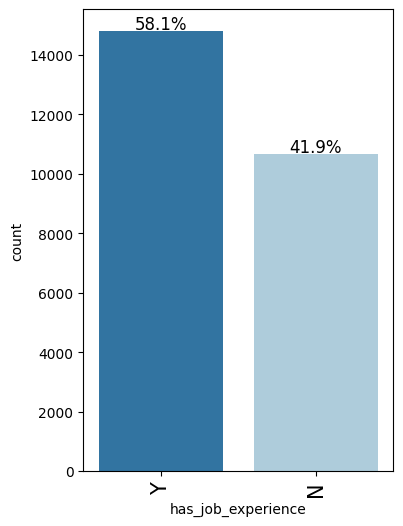

In [ ]:
labeled_barplot(data, 'has_job_experience')

**Requires job training**
- Only 11.6% of visa applications indicated a requirement for job training.

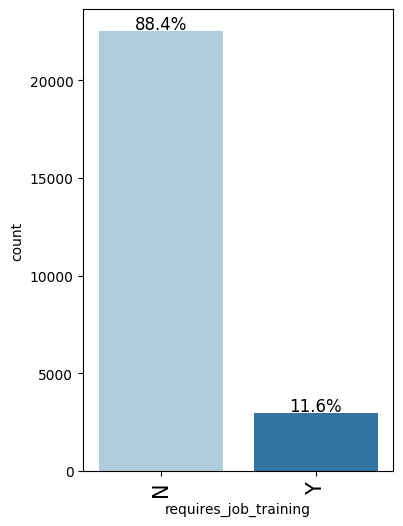

In [ ]:
labeled_barplot(data, 'requires_job_training')

**Region of Employment**
- The Northeast, South, and West regions exhibit comparable levels of demand for job visa applications. Conversely, the Island region demonstrates the lowest demand within this dataset.


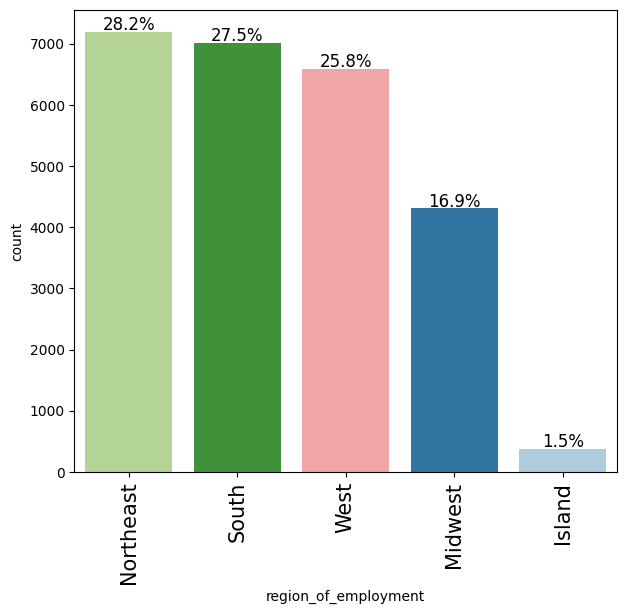

In [ ]:
labeled_barplot(data, 'region_of_employment')

**Unit of wage**
- 90% of our dataset provides wage information on an annual basis.
- 8.5% are reported on an hourly basis.

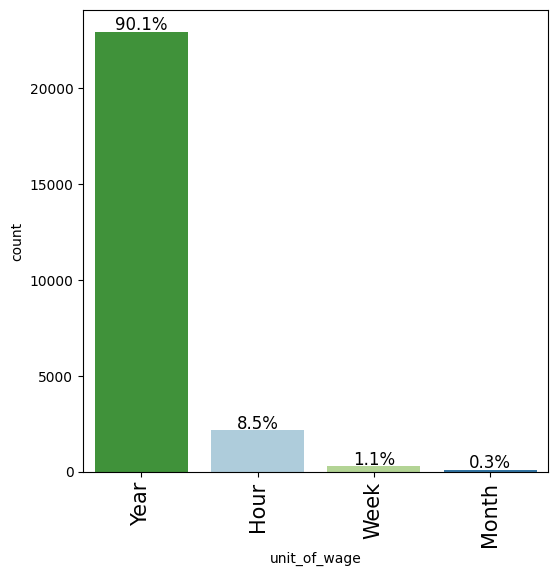

In [ ]:
labeled_barplot(data, 'unit_of_wage')

**Full time position**
- 89.4% of applicants have a full time position

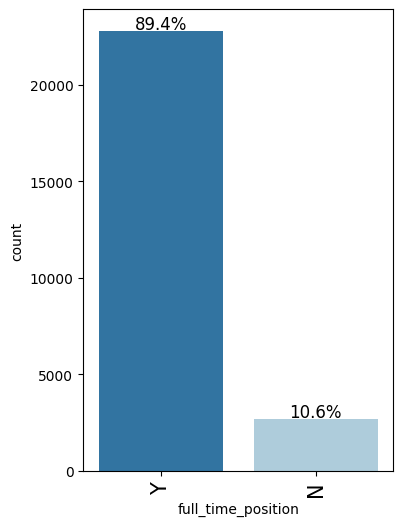

In [ ]:
labeled_barplot(data, ('full_time_position'))

**Prevailing wage**
- The distribution is slightly right skewed with a medium of ~ $70,000
- More than 2000 observations have prevailing wage close to 0.

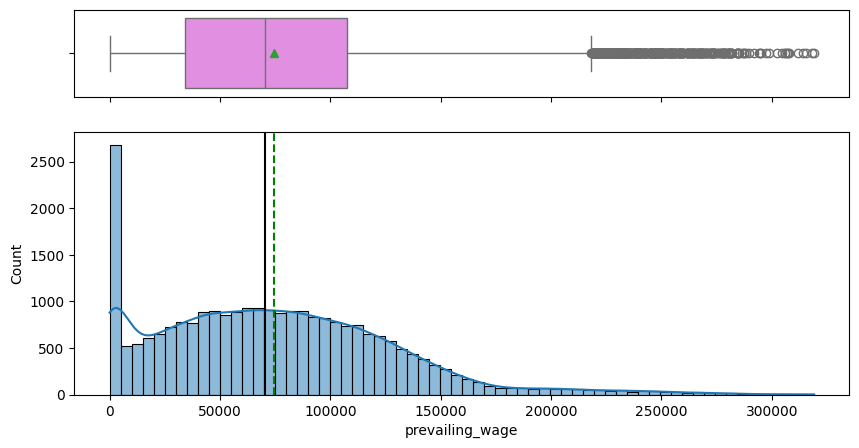

In [ ]:
histogram_boxplot(data, 'prevailing_wage', kde=True)

**Number of Employees**
- The distribution is heavily skewed to the right, indicating a significant number of outliers on the higher end. This suggests the presence of companies with large headcounts.

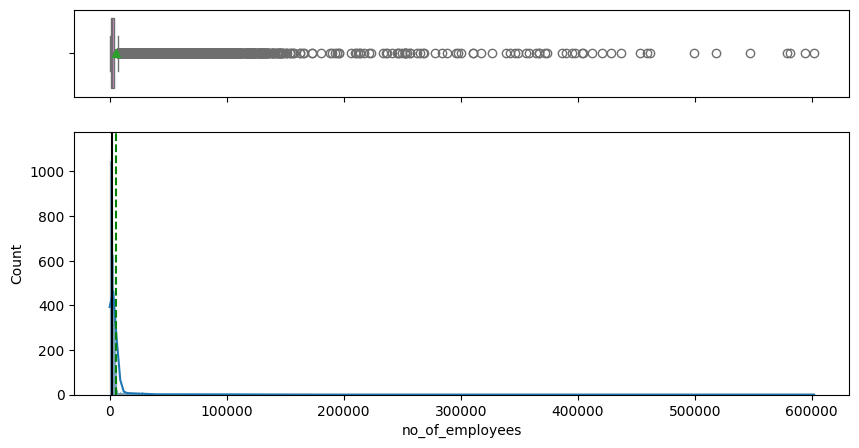

In [ ]:
histogram_boxplot(data, 'no_of_employees', kde=True)

**Year of establishment**
- The distribution is left skewed with many outliers to the lower end.
- Most companies were established in 1997

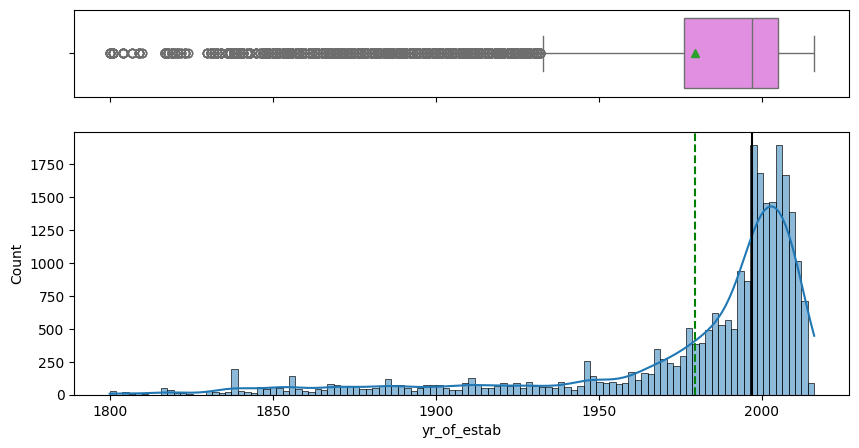

In [ ]:
histogram_boxplot(data, 'yr_of_estab', kde=True)

In [ ]:
data['yr_of_estab'].median()

1997.0

### Bivariate Analysis

####**Case Status vs Job/Possition Profile**
- In relative terms, Europe stands out as the continent with the highest percentage of certified visas followed by Africa and Asia.
- Visa denials are more frequent when wages are reported on an hourly basis compared to monthly, weekly, and yearly units.
- In relative terms, the midwest stands out as the employment region with the highest percentage of certified visas followed the south region of the USA.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


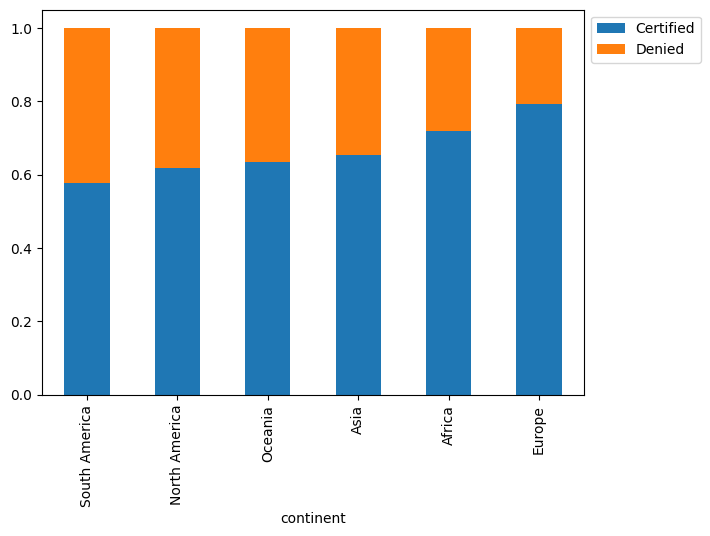

In [ ]:
stacked_barplot(data, 'continent', 'case_status')

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


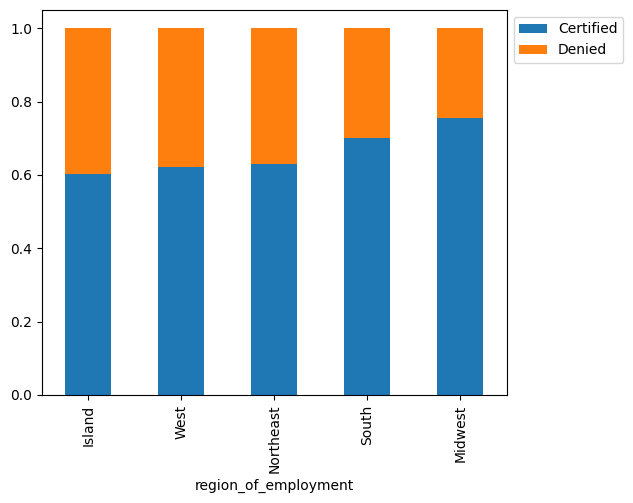

In [ ]:
stacked_barplot(data, 'region_of_employment', 'case_status')

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


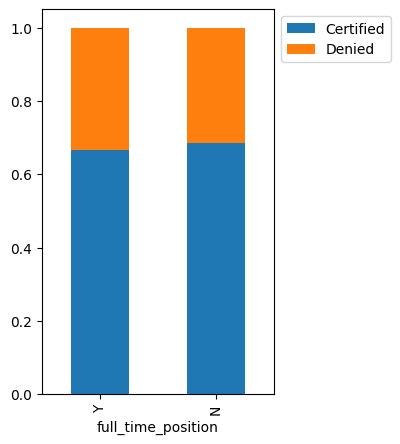

In [ ]:
stacked_barplot(data, 'full_time_position', 'case_status')

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


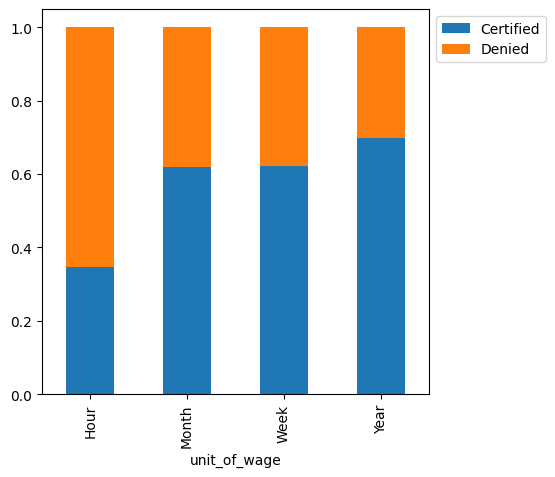

In [ ]:
stacked_barplot(data, 'unit_of_wage', 'case_status')

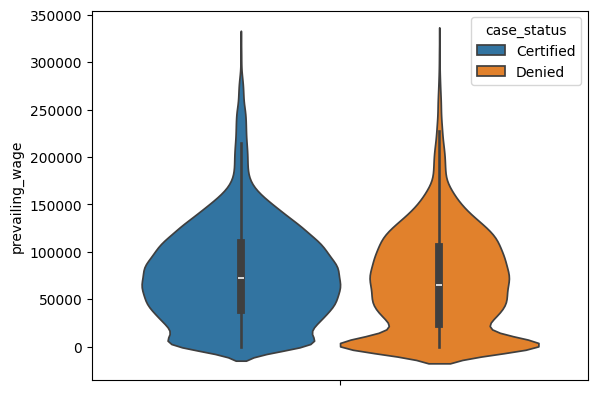

In [ ]:
sns.violinplot(data=data, y='prevailing_wage', hue='case_status');

####**Case Status vs Employee Profile**
- Education appears to be a significant factor in visa approvals, with higher educational backgrounds associated with higher approval rates.
- Visa denials are less common for applicants with job experience.

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


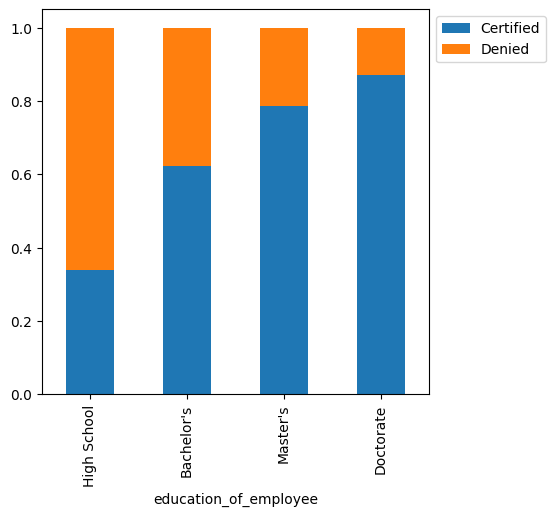

In [ ]:
stacked_barplot(data, 'education_of_employee', 'case_status')

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


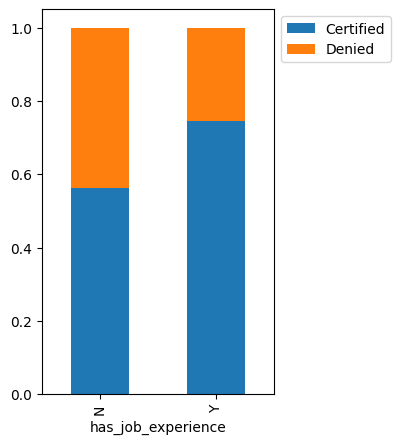

In [ ]:
stacked_barplot(data, 'has_job_experience', 'case_status')

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


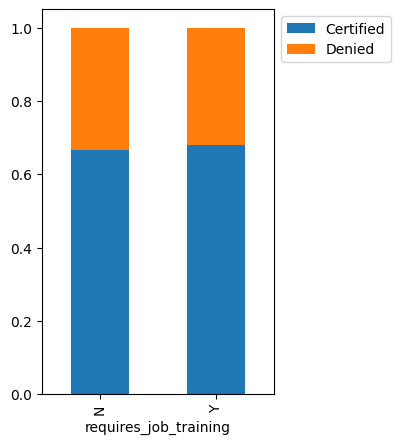

In [ ]:
stacked_barplot(data, 'requires_job_training', 'case_status')

####**Case Status vs Company Background**


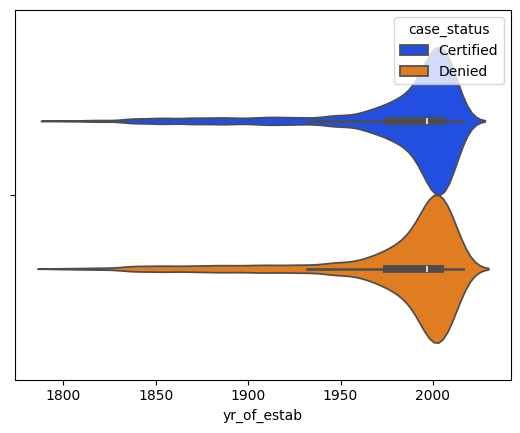

In [ ]:
sns.violinplot(data=data, x='yr_of_estab', hue='case_status', palette= 'bright');

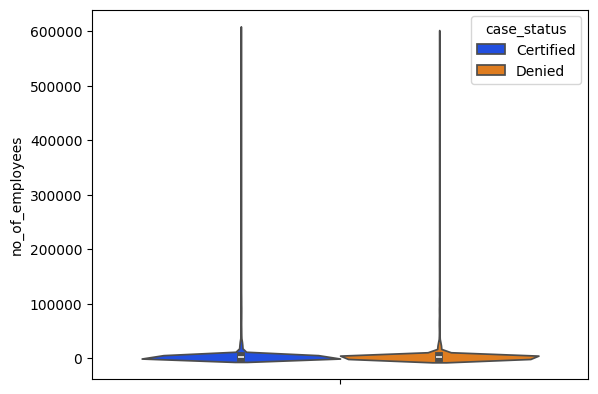

In [ ]:
sns.violinplot(data=data, y='no_of_employees', hue='case_status', palette= 'bright');

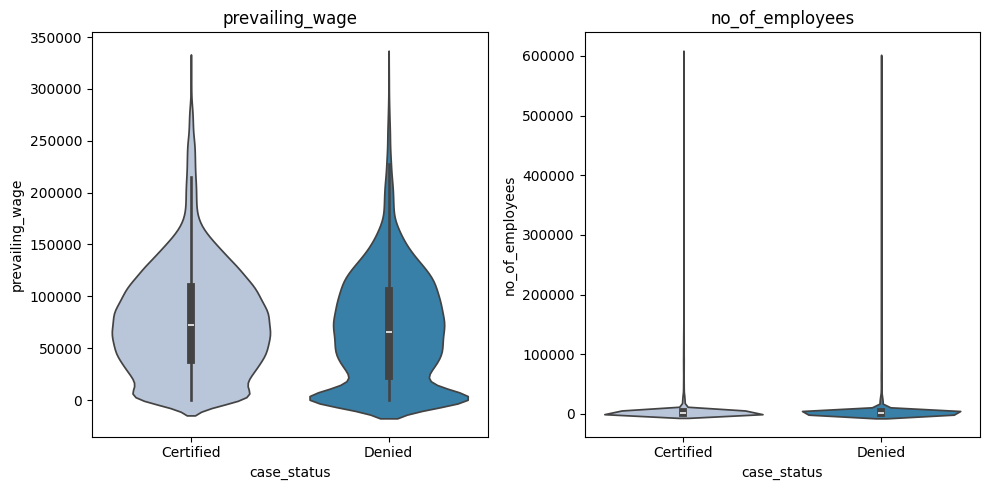

In [ ]:
# MULTIPLE BOXPLOTS COMPARISON WITH TARGET VARIABLE
cols = data[['prevailing_wage','no_of_employees']].columns.tolist()
plt.figure(figsize=(10,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,2,i+1)
                     sns.violinplot(x="case_status",y=variable, data=data, hue='case_status', legend=False ,palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

####**Outlier detection and treatment**

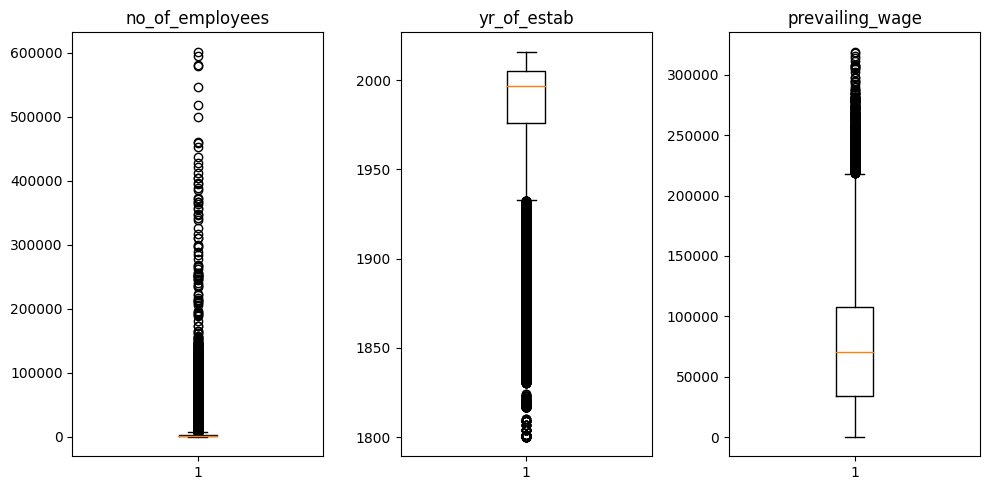

In [ ]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))

for i, variable in enumerate(numeric_columns):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There are some outliers in the data
- However, we won't treat them since they are propper values

In [ ]:
data['age_of_company']=2014-data['yr_of_estab']

In [ ]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,age_of_company
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,7
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,12
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,6
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,117
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,9


####**Preparing data for modeling**

In [ ]:
df = data.copy()

In [ ]:
df['case_status']=df['case_status'].apply(lambda x:1 if x=='Certified' else 0)

In [ ]:
X = df.drop(['case_status'], axis=1)
y = df['case_status']

In [ ]:
X = pd.get_dummies(X, drop_first = True)

In [ ]:
#Splitting data into training set and test set with a 30-70% ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify=y)

In [ ]:
print(X_train.shape, X_test.shape)
print(y.value_counts(1))
print(y_test.value_counts(1))

(17836, 22) (7644, 22)
case_status
1    0.667896
0    0.332104
Name: proportion, dtype: float64
case_status
1    0.667844
0    0.332156
Name: proportion, dtype: float64


####**Performance metric functions**

**Let's define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [ ]:
# Defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
  """
  Function to compute different metrics to check classification model performance

  model = classifier
  predictors = independent variables
  target = dependent variable

  """

  # predicting using the independent variables
  pred = model.predict(predictors)

  acc = accuracy_score(target, pred)
  recall = recall_score(target, pred)
  precision = precision_score(target, pred)
  f1 = f1_score(target, pred)

  # creating a dataframe of metrics
  df_perf_metrics = pd.DataFrame({ 'Accuracy':acc, 'Recall':recall, 'Precision':precision, 'f1':f1 }, index=[0])

  return df_perf_metrics

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
  """
  To plot the confusion_matrix with percentages

  model : classifier
  predictors: Independent Variables
  target : dependent variable
  """

  y_pred = model.predict(predictors)
  cm = confusion_matrix(target, y_pred)
  labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())] for item in cm.flatten()]).reshape(2,2)

  plt.figure(figsize = (6,4))
  sns.heatmap(cm, annot=labels, fmt="")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall Precision and F1
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 on test set : ",metrics.f1_score(y_test,pred_test))



## Building bagging and boosting models

**Model can make wrong predictions as:**
1. Predicting a visa was approved and it was actually denied.
2. Predicting a visa was denied and it was actually approved.

**Which case is more important?**
* Both predictions are equally important since you want grant visas who actualy qualify and deny those who don't.

**How to reduce this loss i.e need to reduce equally False Negatives and False Possitives?**
* We want to maximize F1 performance metric to find a balance of predicting correctly visam approvals and denials.

####Decition Tree

- We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.

In [ ]:
dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)

In [ ]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

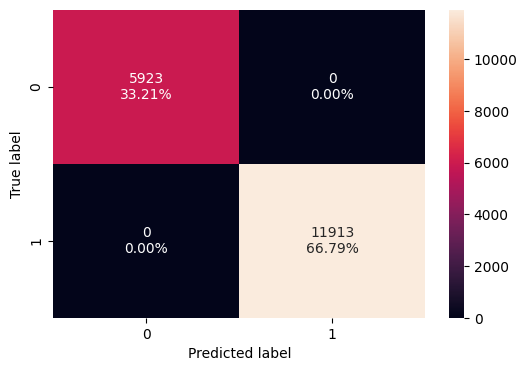

In [ ]:
confusion_matrix_sklearn(dtree, X_train, y_train)

In [ ]:
get_metrics_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.6599947671376243
Recall on training set :  1.0
Recall on test set :  0.7416258570029383
Precision on training set :  1.0
Precision on test set :  0.7473351756810107
F1 on training set :  1.0
F1 on test set :  0.7444695703470652


In [ ]:
dtree_model_train_perf = model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   f1
0       1.0     1.0        1.0  1.0


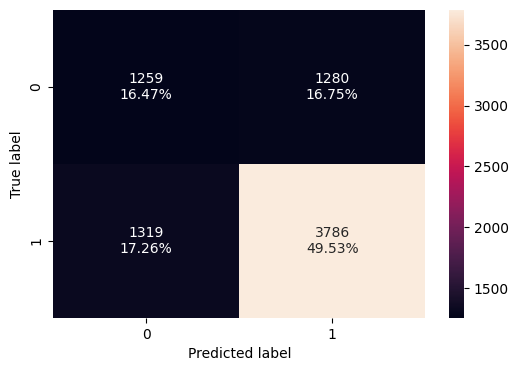

In [ ]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [ ]:
dtree_model_test_perf = model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision       f1
0  0.659995  0.741626   0.747335  0.74447


- Decision tree model shows significant overfitting

#### Bagging Classifier

In [ ]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

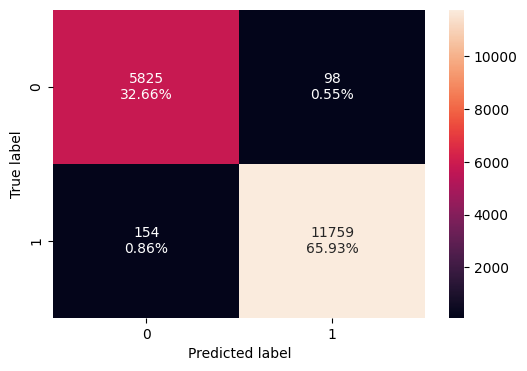

In [ ]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [ ]:
get_metrics_score(bagging)

Accuracy on training set :  0.9858712715855573
Accuracy on test set :  0.6916535845107273
Recall on training set :  0.987072945521699
Recall on test set :  0.7627815866797257
Precision on training set :  0.9917348401787973
Precision on test set :  0.7726190476190476
F1 on training set :  0.9893984013462347
F1 on test set :  0.7676688023656975


In [ ]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        f1
0  0.985871  0.987073   0.991735  0.989398


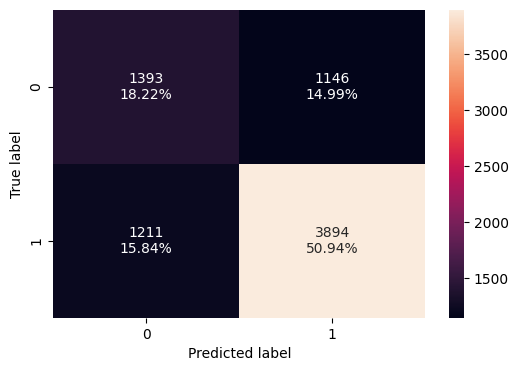

In [ ]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [ ]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        f1
0  0.691654  0.762782   0.772619  0.767669


- Bagging classifier is overfitting on the training set and is performing poorly on the test set in general.

#### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

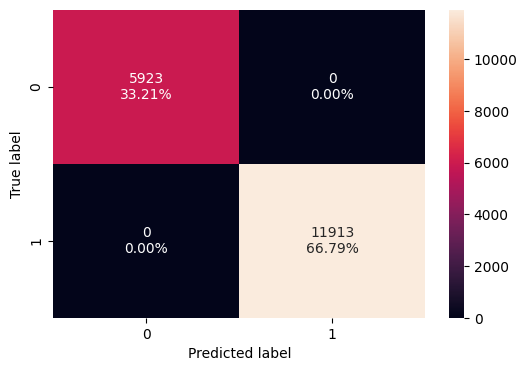

In [ ]:
confusion_matrix_sklearn(rf,X_train,y_train)

In [ ]:
get_metrics_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.7205651491365777
Recall on training set :  1.0
Recall on test set :  0.8323212536728697
Precision on training set :  1.0
Precision on test set :  0.768493398444565
F1 on training set :  1.0
F1 on test set :  0.7991348504795937


In [ ]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   f1
0       1.0     1.0        1.0  1.0


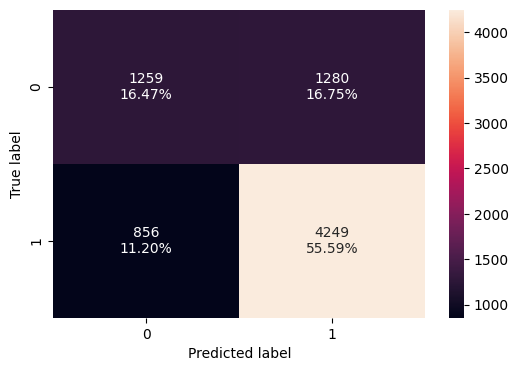

In [ ]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [ ]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        f1
0  0.720565  0.832321   0.768493  0.799135


- Random forest model shows the best performance metrics overall on the test data however, it is overfitting the training data and not being able to generalize well.

#### AdaBoost

In [ ]:
adaboost = AdaBoostClassifier(random_state=1)

In [ ]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

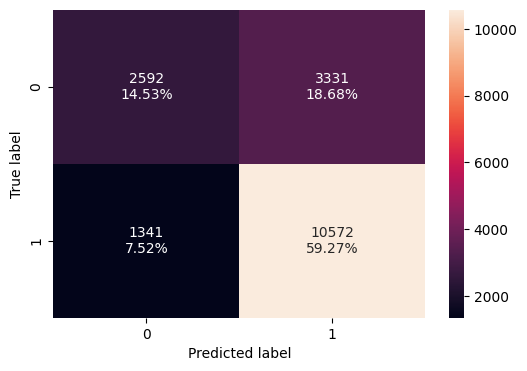

In [ ]:
confusion_matrix_sklearn(adaboost,X_train,y_train)

In [ ]:
get_metrics_score(adaboost)

Accuracy on training set :  0.7380578605068401
Accuracy on test set :  0.7329931972789115
Recall on training set :  0.8874338957441451
Recall on test set :  0.8850146914789422
Precision on training set :  0.7604114219952528
Precision on test set :  0.7565304755525787
F1 on training set :  0.8190269600247909
F1 on test set :  0.815744335108784


In [ ]:
adaboost_model_train_perf=model_performance_classification_sklearn(adaboost,X_train,y_train)
print("Training performance \n",adaboost_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        f1
0  0.738058  0.887434   0.760411  0.819027


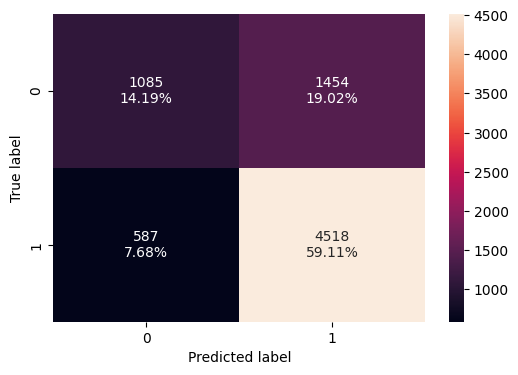

In [ ]:
confusion_matrix_sklearn(adaboost,X_test,y_test)

In [ ]:
adaboost_model_test_perf=model_performance_classification_sklearn(adaboost,X_test,y_test)
print("Testing performance \n",adaboost_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        f1
0  0.732993  0.885015    0.75653  0.815744


- Adaboost model shows good performance metrics for recall and F1 For both training and test data.
- The model appears no overfitting nor underfillting with regards to all performance metrics

####GBM

In [ ]:
gbm = GradientBoostingClassifier(random_state=1)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

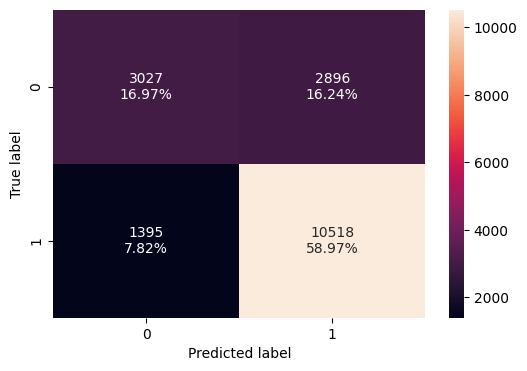

In [ ]:
confusion_matrix_sklearn(gbm,X_train,y_train)

In [ ]:
gbm_model_train_perf=model_performance_classification_sklearn(gbm,X_train,y_train)
print("Training performance \n",gbm_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        f1
0  0.759419  0.882901   0.784106  0.830576


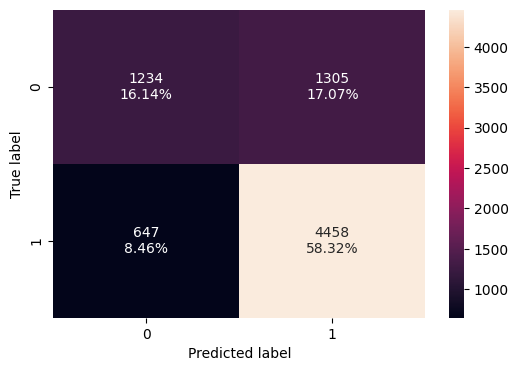

In [ ]:
confusion_matrix_sklearn(gbm,X_test,y_test)

In [ ]:
gbm_model_test_perf=model_performance_classification_sklearn(gbm,X_test,y_test)
print("Testing performance \n",gbm_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision       f1
0  0.744636  0.873262   0.773555  0.82039


In [ ]:
get_metrics_score(gbm)

Accuracy on training set :  0.7594191522762951
Accuracy on test set :  0.7446363160648874
Recall on training set :  0.88290103248552
Recall on test set :  0.8732615083251714
Precision on training set :  0.7841061577456389
Precision on test set :  0.773555439875065
F1 on training set :  0.8305760650688988
F1 on test set :  0.8203901361796098


- GBM shows no overfitting and has good performance metric for f1 and recall

####XGB

In [ ]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

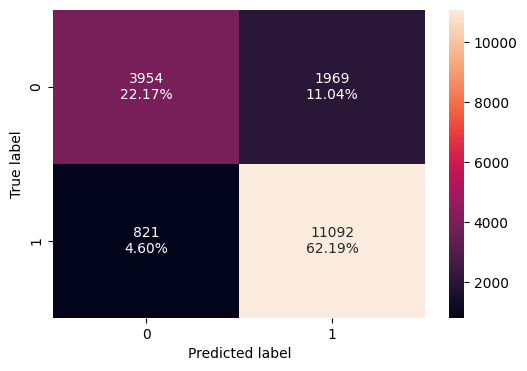

In [ ]:
confusion_matrix_sklearn(xgb,X_train,y_train)

In [ ]:
xgb_model_train_perf=model_performance_classification_sklearn(xgb,X_train,y_train)
print("Training performance \n",xgb_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        f1
0  0.843575  0.931084   0.849246  0.888284


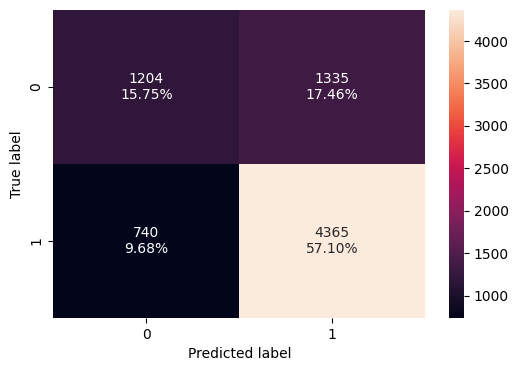

In [ ]:
confusion_matrix_sklearn(xgb,X_test,y_test)

In [ ]:
xgb_model_test_perf=model_performance_classification_sklearn(xgb,X_test,y_test)
print("Testing performance \n",xgb_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        f1
0  0.728545  0.855044   0.765789  0.807959


In [ ]:
get_metrics_score(xgb)

Accuracy on training set :  0.8435747925543844
Accuracy on test set :  0.72854526425955
Recall on training set :  0.9310836900864602
Recall on test set :  0.8550440744368266
Precision on training set :  0.8492458464129852
Precision on test set :  0.7657894736842106
F1 on training set :  0.8882838151677744
F1 on test set :  0.8079592781119852


- XGBoost model shows overfitting on the training data not being able to generalize well accross all performace metrics

##  Will tuning the hyperparameters improve the model performance?

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

####Tuned desicion tree

In [ ]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.33,1:0.67},random_state=1)

# Grid of parameters to choose from
parameters = {
        'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.67}, max_depth=4,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       random_state=1)

In [ ]:
get_metrics_score(dtree_estimator)

Accuracy on training set :  0.7240412648575913
Accuracy on test set :  0.7157247514390371
Recall on training set :  0.9395618232183329
Recall on test set :  0.938099902056807
Precision on training set :  0.7270542383890873
Precision on test set :  0.7205838098104123
F1 on training set :  0.8197597773546214
F1 on test set :  0.8150795676963662


In [ ]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       f1
0  0.724041  0.939562   0.727054  0.81976


In [ ]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision       f1
0  0.715725  0.9381   0.720584  0.81508


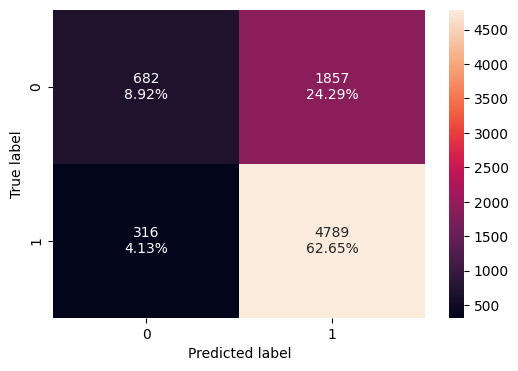

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

####Tuned Bagging Model

In [ ]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.33,1:0.67},random_state=1)
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'f1', cv = 5)
grid.fit(X_train, y_train)

## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70,
                  random_state=1)

In [ ]:
get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9979255438439112
Accuracy on test set :  0.7250130821559393
Recall on training set :  0.9997481742634097
Recall on test set :  0.8781586679725759
Precision on training set :  0.99715338245144
Precision on test set :  0.7518027838336407
F1 on training set :  0.9984490925095361
F1 on test set :  0.8100831225153596


In [ ]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator,X_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        f1
0  0.997926  0.999748   0.997153  0.998449


In [ ]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator,X_test,y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        f1
0  0.725013  0.878159   0.751803  0.810083


#### Tuned Random Forest

In [ ]:
# Choose the type of classifier.
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='f1',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.4, min_samples_leaf=3, n_estimators=110,
                       random_state=1)

In [ ]:
get_metrics_score(rf_estimator)

Accuracy on training set :  0.7972639605292666
Accuracy on test set :  0.7439822082679226
Recall on training set :  0.9114412826324184
Recall on test set :  0.8754162585700294
Precision on training set :  0.8091512035174007
Precision on test set :  0.7718480138169257
F1 on training set :  0.8572556450339492
F1 on test set :  0.8203763194125746


In [ ]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        f1
0  0.797264  0.911441   0.809151  0.857256


In [ ]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        f1
0  0.743982  0.875416   0.771848  0.820376


####Tuned AdaBoost

- An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
- Some important hyperparamters are:
    - base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
    - n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
    - learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, random_state=1)

In [ ]:
get_metrics_score(abc_tuned)

Accuracy on training set :  0.7531397174254317
Accuracy on test set :  0.7408424908424909
Recall on training set :  0.8881893729539159
Recall on test set :  0.8818805093046034
Precision on training set :  0.7750512745385292
Precision on test set :  0.7656462585034014
F1 on training set :  0.8277723450029336
F1 on test set :  0.8196631770596269


In [ ]:
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print("Training performance \n",abc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        f1
0   0.75314  0.888189   0.775051  0.827772


In [ ]:
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print("Testing performance \n",abc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        f1
0  0.740842  0.881881   0.765646  0.819663


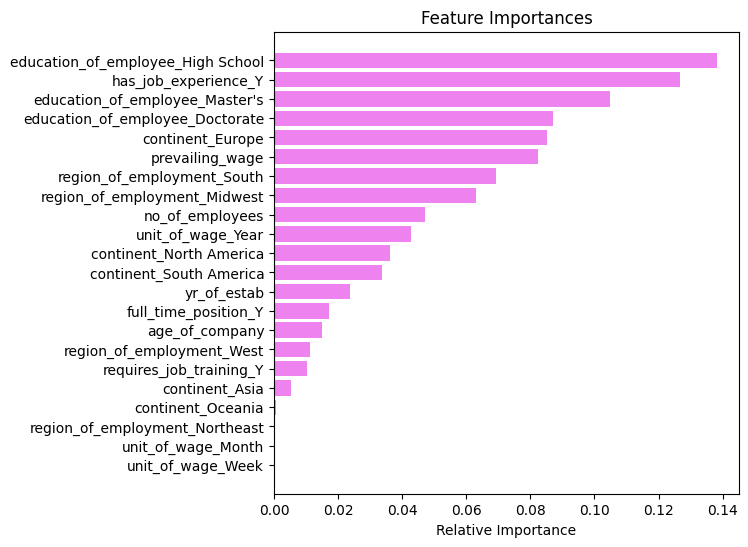

In [ ]:
feature_names = X_test.columns
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Tuned Gradiant Boost

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.9)

In [ ]:
get_metrics_score(gbc_tuned)

Accuracy on training set :  0.7544853106077596
Accuracy on test set :  0.7422815279958137
Recall on training set :  0.8871820700075548
Recall on test set :  0.879333986287953
Precision on training set :  0.7769038518082917
Precision on test set :  0.7682697244566148
F1 on training set :  0.8283889171924601
F1 on test set :  0.8200584581658751


In [ ]:
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance \n",gbc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        f1
0  0.754485  0.887182   0.776904  0.828389


In [ ]:
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance \n",gbc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        f1
0  0.742282  0.879334    0.76827  0.820058


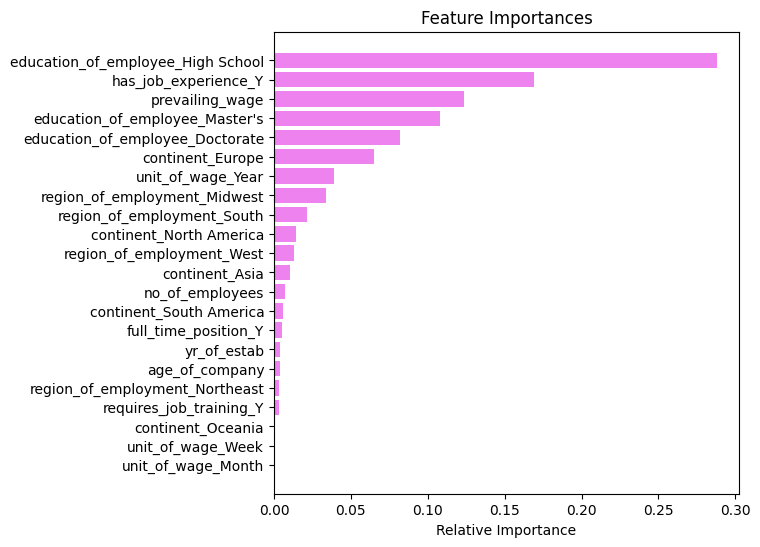

In [ ]:
feature_names = X_test.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T, dtree_estimator_model_train_perf.T, bagging_model_train_perf.T, bagging_estimator_model_train_perf.T, rf_model_train_perf.T,rf_estimator_model_train_perf.T,
    adaboost_model_train_perf.T,abc_tuned_model_train_perf.T,gbm_model_train_perf.T,gbc_tuned_model_train_perf.T,],
    axis=1,)

models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging",
    "Bagging Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Adaboost",
    "Adaboost Tuned",
    "Gradient Boost",
    "Gradient Boost Tuned",
]

print("Training performance comparison:")
models_train_comp_df


Training performance comparison:


,Decision Tree,Decision Tree Tuned,Bagging,Bagging Tuned,Random Forest,Random Forest Tuned,Adaboost,Adaboost Tuned,Gradient Boost,Gradient Boost Tuned
Accuracy,1.0,0.724041,0.985871,0.997926,1.0,0.797264,0.738058,0.753140,0.759419,0.754485
Recall,1.0,0.939562,0.987073,0.999748,1.0,0.911441,0.887434,0.888189,0.882901,0.887182
Precision,1.0,0.727054,0.991735,0.997153,1.0,0.809151,0.760411,0.775051,0.784106,0.776904
f1,1.0,0.819760,0.989398,0.998449,1.0,0.857256,0.819027,0.827772,0.830576,0.828389


In [ ]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T, dtree_estimator_model_test_perf.T, bagging_model_test_perf.T, bagging_estimator_model_test_perf.T, rf_model_test_perf.T,rf_estimator_model_test_perf.T,
    adaboost_model_test_perf.T,abc_tuned_model_test_perf.T,gbm_model_test_perf.T,gbc_tuned_model_test_perf.T,],
    axis=1,)

models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging",
    "Bagging Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Adaboost",
    "Adaboost Tuned",
    "Gradient Boost",
    "Gradient Boost Tuned",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Bagging,Bagging Tuned,Random Forest,Random Forest Tuned,Adaboost,Adaboost Tuned,Gradient Boost,Gradient Boost Tuned
Accuracy,0.659995,0.715725,0.691654,0.725013,0.720565,0.743982,0.732993,0.740842,0.744636,0.742282
Recall,0.741626,0.938100,0.762782,0.878159,0.832321,0.875416,0.885015,0.881881,0.873262,0.879334
Precision,0.747335,0.720584,0.772619,0.751803,0.768493,0.771848,0.756530,0.765646,0.773555,0.768270
f1,0.744470,0.815080,0.767669,0.810083,0.799135,0.820376,0.815744,0.819663,0.820390,0.820058



- Both the Adaboost Tuned and Gradient Boost Tuned models exhibit strong performance metrics, particularly in terms of F1 score, showcasing their ability to generalize effectively from training to testing datasets.

## Actionable Insights and Recommendations

- 68% of observations resulted in certifications.
- Both the tuned Adaboost and tuned Gradient Boost models serve as effective predictive models for visa approvals. They demonstrate robust performance metrics, especially in F1 score, underscoring their capacity to generalize well from training to testing datasets.
- Key factors contributing to visa approvals in both models include a high school education, job experience, possession of master's and doctoral degrees, originating from Europe, and meeting prevailing wage requirements, among other variables.
- The Northeast, South, and West regions demonstrate similar levels of demand for job visa applications, while the Island region exhibits the lowest demand in this dataset.
- Only 11.6% of visa applications indicated a need for job training.
- Job experience is reported by 58.1% of applicants.
- Asia represents the highest demand for visas, accounting for 66.2% of all observations, followed by Europe with 14.6% and North America with 12.9%.
- However, Europe stands out as the continent with the highest percentage of certified visas followed by Africa and Asia.
- Visa denials are more frequent when wages are reported on an hourly basis compared to monthly, weekly, and yearly units.
- In relative terms, the midwest stands out as the employment region with the highest percentage of certified visas followed the south region of the USA.
- Education appears to be a significant factor in visa approvals, with higher educational backgrounds associated with higher approval rates.
- Visa denials are less common for applicants with job experience.